# Analysis of Price Action predictability with Fibonacci retracements

In [2]:
## Load required libraries:

import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def peak_detect(series,n=5,order=10):
    
    # This function finds the latest n inflexion points
    # in the series provided.
    
    # Find out relative local extrema:
    max_ind = list(argrelextrema(series,np.greater,order=order)[0])
    min_ind = list(argrelextrema(series,np.less,order=order)[0])

    idx = max_ind + min_ind + [len(series)-1]

    idx.sort()

    current_idx = idx[-n:] # Take the last n peaks
    
    start = min(current_idx)
    end = max(current_idx)
    
    current_pat = series[current_idx]
    
    return current_idx,current_pat,start,end

In [4]:
def is_fib_retracement(moves,err_allowed=0.05,level=0.618):
    
    # This function takes the distances from different peaks (i.e. moves)
    # and determines if the current value of the series is at a retracement
    # level (default: 0.618 or 61.8%)
    
    XA = moves[0]
    AB = moves[1]
    
    if (XA > 0 and AB < 0 ) or (XA < 0 and AB > 0 ):
    
        AB_range = np.array([level - err_allowed,level + err_allowed])*abs(XA)
        if AB_range[0] < abs(AB) < AB_range[1]:
            return 1
        else:
            return np.NAN
    else:
        return np.NAN

### Simple Example of the functions

In [5]:
# import sample data:
data = pd.read_csv('..\Historical Data\EURUSD60.csv')

In [6]:
# Set the data to time series and get price series i.e. Closing price
data.Time = pd.to_datetime(data.Time,format = "%Y/%m/%d %H:%M")
data = data.set_index(data.Time)
data = data[['Close']]

series = data.Close

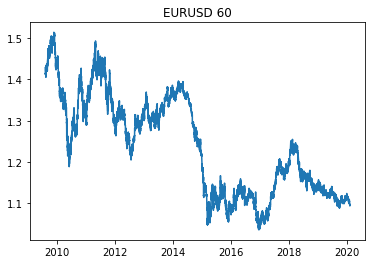

In [7]:
# Plot price series:
plt.plot(series)
plt.title('EURUSD 60')
plt.show()

In [13]:
## Lets take the last 240 hours (which is rougly two weeks)
sample = series[-240:]
sample.head()

Time
2020-01-26 23:00:00    1.10300
2020-01-27 00:00:00    1.10244
2020-01-27 01:00:00    1.10320
2020-01-27 02:00:00    1.10335
2020-01-27 03:00:00    1.10289
Name: Close, dtype: float64

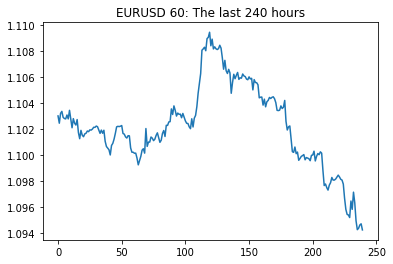

In [15]:
# Plot the sample:
plt.plot(sample.values)
plt.title('EURUSD 60: The last 240 hours')
plt.show()

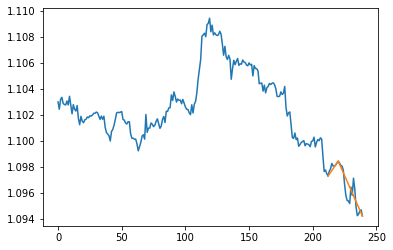

In [41]:
# Detect the peaks and plot sample series with peaks:

current_idx,current_pat,start,end = peak_detect(sample.values,n=3,order=10)

plt.plot(sample.values)
plt.plot(current_idx,current_pat)
plt.show()

In [ ]:
# create moves and determine if they are a fibonacci retracement of a certain level: 

XA = current_pat[1] - current_pat[0]
AB = current_pat[2] - current_pat[1]

# Fib retracement yes/no.